C:\Anaconda3\Lib\site-packages\pvradar\sdk\common\pvradar_location.py:29: UserWarning:

tz_offset seems to be a float 5.5. Fractional part will be ignored.



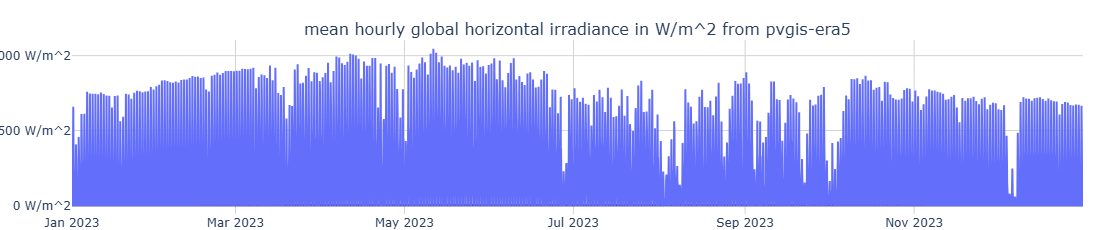

global_horizontal_irradiance: mean hourly global horizontal irradiance in W/m^2 from pvgis (pvgis-era5)
8760 data points (2023-01-01 00:00:00+05:00 to 2023-12-31 23:00:00+05:00)


In [5]:
import pandas as pd
from pvradar.sdk import PvradarSite, describe, resource_plot, R

site = PvradarSite(location=(23.34, 85.30), interval='2023-01-01..2023-12-31')
ghi = site.resource(R.global_horizontal_irradiance)

resource_plot(ghi)
print(describe(ghi))

In [7]:
from pvradar.sdk import PvradarSite
site = PvradarSite(location=(23.34, 85.30), interval='2023..2023')

C:\Anaconda3\Lib\site-packages\pvradar\sdk\common\pvradar_location.py:29: UserWarning:

tz_offset seems to be a float 5.5. Fractional part will be ignored.



In [9]:
rainfall = site.resource(R.rainfall) # returns total hourly rainfall in mm
pm2_5 = site.resource(R.pm2_5_volume_concentration) # mean hourly pm2.5 volume concentration in Kg/m^3
pm10 = site.resource(R.pm10_volume_concentration) # mean hourly pm10 volume concentration in Kg/m^3

In [11]:
describe(rainfall)

rainfall: total hourly rainfall in mm from merra2
8760 data points (2023-01-01 00:00:00+05:00 to 2023-12-31 23:00:00+05:00)

In [13]:
describe(pm2_5)

pm2_5: mean hourly pm2 5 volume concentration in kg/m^3 from merra2
8760 data points (2023-01-01 00:00:00+05:00 to 2023-12-31 23:00:00+05:00)

In [15]:
describe(pm10)

pm10: mean hourly pm10 volume concentration in kg/m^3 from merra2
8760 data points (2023-01-01 00:00:00+05:00 to 2023-12-31 23:00:00+05:00)

In [17]:
from pvlib.soiling import hsu
soiling_hsu = hsu(rainfall, 1, 19, pm2_5, pm10) # cleaning threshold = 1 mm, tilt = 25 deg

In [19]:
describe(soiling_hsu)

hourly unknown resource
8760 data points (2023-01-01 00:00:00+05:00 to 2023-12-31 23:00:00+05:00)

# Soiling losses #

In [23]:
from pvradar.sdk import PvradarSite, R, resource_plot, for_resource, make_tracker_design

In [25]:
location = 23.34, 85.30  # Ranchi, Jharkhand
site = PvradarSite(location=location, interval='2020..2023')

C:\Anaconda3\Lib\site-packages\pvradar\sdk\common\pvradar_location.py:29: UserWarning:

tz_offset seems to be a float 5.5. Fractional part will be ignored.



In [27]:
site.design = make_tracker_design(max_tracking_angle=60, night_stow_angle=20, dc_ac_ratio=1.0)

In [29]:
# Import wrappers aroung pvlib models
from pvradar.sdk.pv.irradiance.losses.soiling import pvlib_soiling_hsu, pvlib_soiling_kimber

# Select the soiling model
my_soiling_model = pvlib_soiling_hsu
# my_soiling_model = pvlib_soiling_kimber  # Uncomment to try Kimber model

In [31]:
# set preferred rainfall datasource
site.hooks(for_resource(R.rainfall).prefer_datasource('merra2'));

In [33]:
# Run the model
soiling_loss_factor = site.run(my_soiling_model)

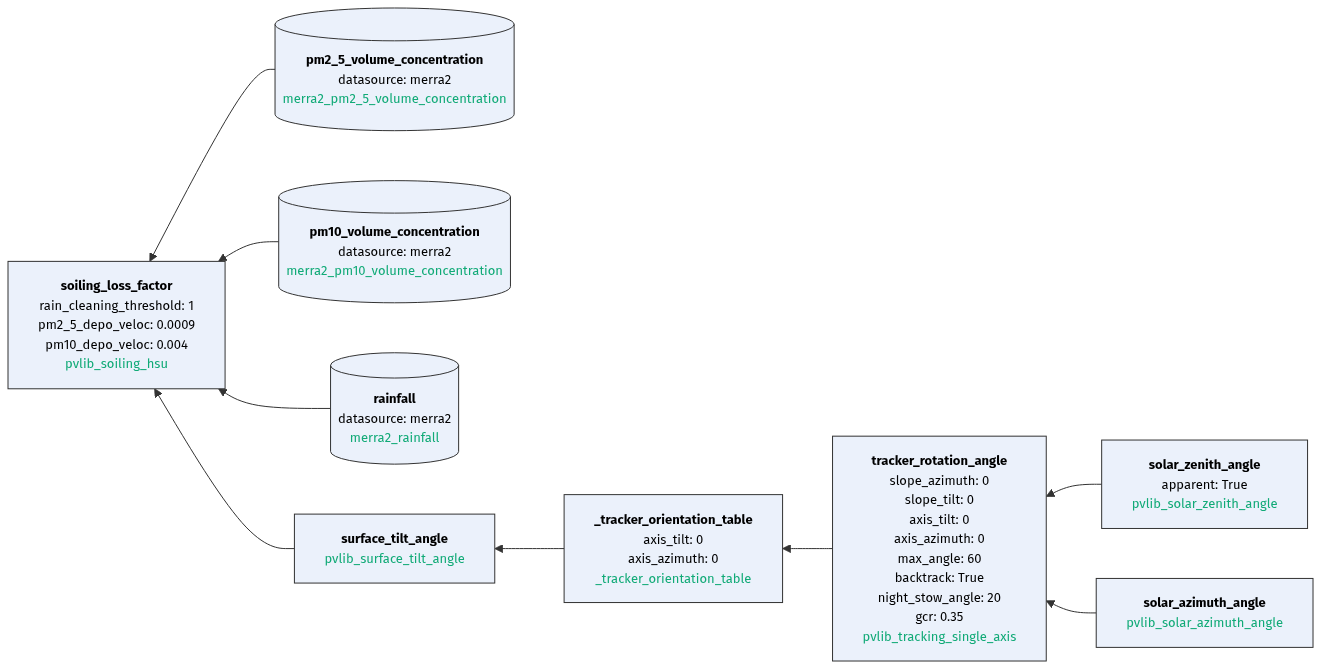

In [37]:
site.profile(my_soiling_model).display_flowchart()

In [39]:
rainfall = site.resource(R.rainfall(to_unit='cm', to_freq='D'))
pm2_5 = site.resource(R.pm2_5_volume_concentration(to_unit='g/m^3', to_freq='D'))
pm10 = site.resource(R.pm10_volume_concentration(to_unit='g/m^3', to_freq='D'))

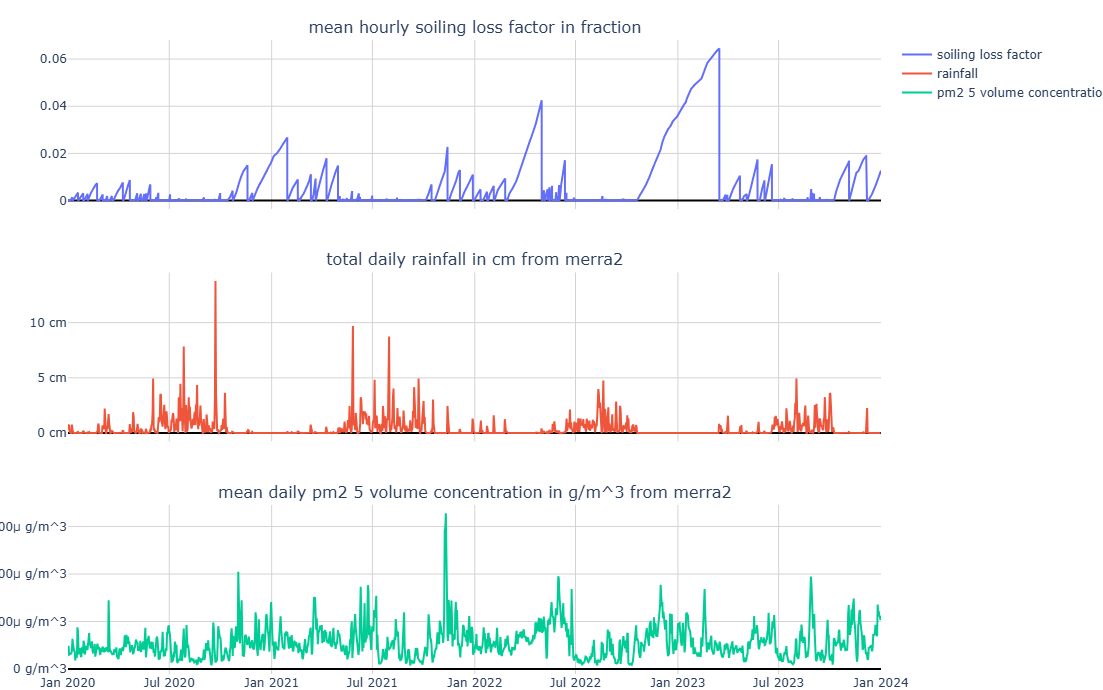

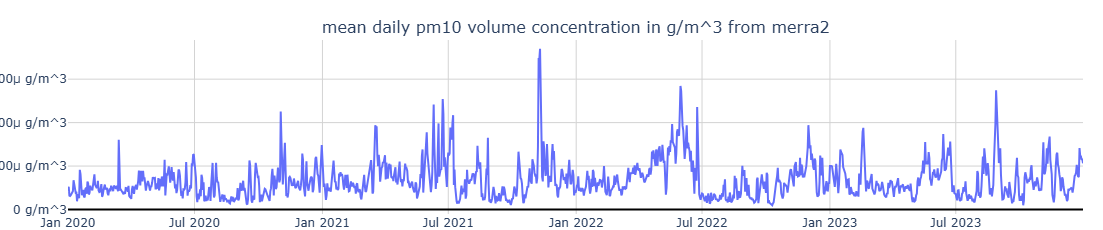

In [43]:
resource_plot(soiling_loss_factor, rainfall, pm2_5)
resource_plot (pm10)

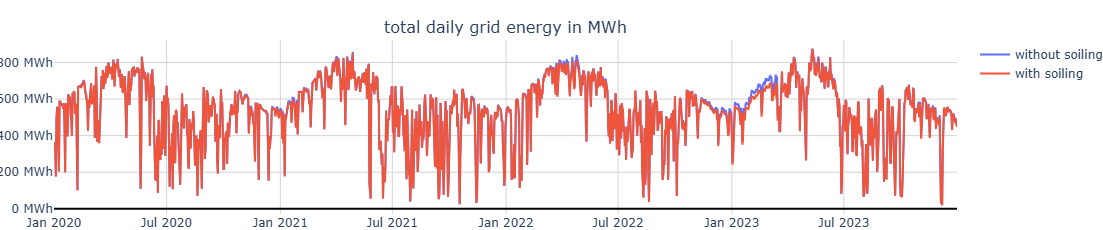

In [61]:
# Energy without soiling losses
energy_without_soiling = site.resource(R.grid_energy(to_unit='MWh', to_freq='D'), label='without soiling')

# Energy with soiling losses
with site.hooks(for_resource(R.soiling_loss_factor).use_model(my_soiling_model)):
    energy_with_soiling = site.resource(R.grid_energy(to_unit='MWh', to_freq='D'), label='with soiling')

# # Plot both
resource_plot(energy_without_soiling, energy_with_soiling)
# resource_plot(energy_with_soiling)